# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# your code here
df = pd.read_csv('tic-tac-toe.csv')
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")  # (rows, columns)


Data loaded successfully!
Dataset shape: (958, 10)


In [7]:
# 2. Inspect the dataset
print("\n--- Dataset Inspection ---")
print("First 5 rows:")
print(df.head())  # .head() shows first 5 rows by default

print("\nDataset info:")
print(df.info())  # .info() shows data types and non-null counts

print("\nValue counts for each column:")
# Check what values exist in each column
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")  # .unique() shows all unique values

# Check class distribution
print(f"\nClass distribution:")
print(df['class'].value_counts())  # .value_counts() shows frequency of each value



--- Dataset Inspection ---
First 5 rows:
  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None

Value counts for each column:

TL: ['x' 'o' 'b']

TM: ['x' 'o' 'b']

TR: ['x' 'o' 'b']

ML: ['x' 'o' 'b']

MM: ['o' 'b' 'x']

MR: ['o'

In [8]:
# 3. Convert categorical values to numeric
print("\n--- Converting Categorical to Numeric ---")

# Create a copy to avoid modifying original data
df_encoded = df.copy()

# Method 1: Manual mapping for tic-tac-toe specific values
# We know the values are 'x', 'o', 'b' for positions and True/False for class
position_mapping = {'b': 0, 'x': 1, 'o': 2}  # Dictionary mapping
class_mapping = {True: 1, False: 0}

# Apply mapping to first 9 columns (game positions)
position_columns = df.columns[:-1]  # All columns except the last one
for col in position_columns:
    df_encoded[col] = df_encoded[col].map(position_mapping)
    # .map() applies the mapping dictionary to transform values

# Apply mapping to class column
df_encoded['class'] = df_encoded['class'].map(class_mapping)

print("Categorical conversion completed!")
print("Sample of encoded data:")
print(df_encoded.head())

# Verify no missing values after encoding
print(f"Missing values: {df_encoded.isnull().sum().sum()}")  # Should be 0



--- Converting Categorical to Numeric ---
Categorical conversion completed!
Sample of encoded data:
   TL  TM  TR  ML  MM  MR  BL  BM  BR  class
0   1   1   1   1   2   2   1   2   2      1
1   1   1   1   1   2   2   2   1   2      1
2   1   1   1   1   2   2   2   2   1      1
3   1   1   1   1   2   2   2   0   0      1
4   1   1   1   1   2   2   0   2   0      1
Missing values: 0


In [9]:
# 4. Separate inputs (X) and output (y)
print("\n--- Separating Features and Target ---")

# X contains all features (first 9 columns - the game board positions)
X = df_encoded.iloc[:, :-1].values  # .iloc[:, :-1] means "all rows, all columns except last"
# .values converts DataFrame to numpy array

# y contains the target variable (last column - whether X wins)
y = df_encoded.iloc[:, -1].values   # .iloc[:, -1] means "all rows, last column only"

print(f"Features shape: {X.shape}")  # Should be (n_samples, 9)
print(f"Target shape: {y.shape}")    # Should be (n_samples,)
print(f"Feature data type: {X.dtype}")
print(f"Target data type: {y.dtype}")


--- Separating Features and Target ---
Features shape: (958, 9)
Target shape: (958,)
Feature data type: int64
Target data type: int64


In [10]:
# 5. Normalize the input data
print("\n--- Normalizing Input Data ---")

# StandardScaler normalizes features to have mean=0 and std=1
# This helps neural networks train better and faster
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# .fit_transform() calculates mean/std and applies the transformation

print("Input data normalized!")
print(f"Original X range: [{X.min()}, {X.max()}]")
print(f"Normalized X range: [{X_normalized.min():.3f}, {X_normalized.max():.3f}]")
print(f"Normalized X mean: {X_normalized.mean():.3f}")  # Should be close to 0
print(f"Normalized X std: {X_normalized.std():.3f}")    # Should be close to 1



--- Normalizing Input Data ---
Input data normalized!
Original X range: [0, 2]
Normalized X range: [-1.703, 1.185]
Normalized X mean: -0.000
Normalized X std: 1.000


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [11]:
# your code here
# 1. Split training and test data
print("\n--- Splitting Data ---")
# train_test_split randomly splits data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducible results
    stratify=y          # Maintains same class distribution in train/test
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")



--- Splitting Data ---
Training set: 766 samples
Test set: 192 samples
Training target distribution: [265 501]
Test target distribution: [ 67 125]


In [12]:
# 2. Create a Sequential model
print("\n--- Creating Neural Network Model ---")
# Sequential model: layers are added one after another in sequence
model = tf.keras.Sequential()


--- Creating Neural Network Model ---


In [13]:
# 3. Add layers to the model
# Input layer is implicit - defined by first layer's input_shape

# First hidden layer
model.add(tf.keras.layers.Dense(
    units=16,           # Number of neurons
    activation='relu',  # ReLU activation function: max(0, x)
    input_shape=(9,)    # Input shape: 9 features (tic-tac-toe board positions)
))
# Dense layer: fully connected layer where each neuron connects to all previous neurons

# Second hidden layer
model.add(tf.keras.layers.Dense(
    units=8,            # Fewer neurons as we go deeper
    activation='relu'   # ReLU for non-linearity
))

# Output layer
model.add(tf.keras.layers.Dense(
    units=2,                # 2 classes: win (1) or not win (0)
    activation='softmax'    # Softmax: converts outputs to probabilities that sum to 1
))

# Display model architecture
print("Model architecture:")
model.summary()  # Shows layers, parameters, and output shapes

Model architecture:


d:\ironhack\Coursework\week_13\lesson_3\lab-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314 (1.23 KB)

 Trainable params: 314 (1.23 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 4. Compile the model
print("\n--- Compiling Model ---")
model.compile(
    optimizer='adam',                        # Adam optimizer: adaptive learning rate
    loss='sparse_categorical_crossentropy',  # For integer labels (0, 1)
    metrics=['accuracy']                     # Track accuracy during training
)
# Compilation prepares model for training by specifying optimization and loss

print("Model compiled successfully!")


--- Compiling Model ---
Model compiled successfully!


In [15]:
# 5. Fit the training data
print("\n--- Training Model ---")
# .fit() trains the model on the training data
history = model.fit(
    X_train, y_train,           # Training data
    epochs=100,                 # Number of complete passes through training data
    batch_size=32,              # Number of samples processed before updating weights
    validation_split=0.1,       # Use 10% of training data for validation
    verbose=1                   # Show progress during training
)

print("Model training completed!")


--- Training Model ---
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6444 - loss: 0.6784 - val_accuracy: 0.6364 - val_loss: 0.6588
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6459 - loss: 0.6564 - val_accuracy: 0.6364 - val_loss: 0.6325
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6401 - loss: 0.6396 - val_accuracy: 0.6494 - val_loss: 0.6128
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6264 - val_accuracy: 0.6623 - val_loss: 0.5954
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6691 - loss: 0.6149 - val_accuracy: 0.6883 - val_loss: 0.5823
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6691 - loss: 0.6042 - val_accuracy: 0.6883 - val_loss: 0.5679
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 0.5940 - val_accuracy: 0.6753 - val_loss: 0.5576
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6792 - loss: 0.5852 - 

In [16]:
# 6. Evaluate model with test data
print("\n--- Evaluating Model ---")
# .evaluate() tests the model on unseen test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for detailed analysis
y_pred_proba = model.predict(X_test)  # Get probability predictions
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class predictions

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


--- Evaluating Model ---
Test Loss: 0.4496
Test Accuracy: 0.7760
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66        67
           1       0.81      0.86      0.83       125

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192


Confusion Matrix:
[[ 41  26]
 [ 17 108]]


In [18]:
# 7. Save the model
print("\n--- Saving Model ---")
# TensorFlow/Keras now requires specific file extensions:
# .keras (recommended) - Native Keras format
# .h5 - HDF5 format (legacy)
model.save('tic-tac-toe.keras')  # Saves entire model (architecture + weights)
print("Model saved as 'tic-tac-toe.keras'")

# Alternative saving methods:
# model.save('tic-tac-toe.h5')  # HDF5 format
# model.export('tic-tac-toe_savedmodel')  # SavedModel format for deployment


--- Saving Model ---
Model saved as 'tic-tac-toe.keras'


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [19]:
# your code here
# Step 3: Make Predictions
print("\n\n=== STEP 3: MAKE PREDICTIONS ===")

# Load the saved model
print("--- Loading Saved Model ---")
loaded_model = tf.keras.models.load_model('tic-tac-toe.keras')
print("Model loaded successfully!")

# Test on random rows from test dataset
print("\n--- Testing Random Predictions ---")
np.random.seed(42)  # For reproducible random selection
random_indices = np.random.choice(len(X_test), 5, replace=False)  # Select 5 random samples

for i, idx in enumerate(random_indices):
    # Get actual sample
    sample_X = X_test[idx:idx+1]  # Keep 2D shape for model input
    actual_y = y_test[idx]
    
    # Make prediction
    prediction_proba = loaded_model.predict(sample_X, verbose=0)
    predicted_y = np.argmax(prediction_proba)
    confidence = np.max(prediction_proba)
    
    # Convert back to original scale for interpretation
    original_sample = scaler.inverse_transform(sample_X)[0]
    
    print(f"\nPrediction {i+1}:")
    print(f"  Board state: {original_sample}")
    print(f"  Actual outcome: {'X wins' if actual_y == 1 else 'X does not win'}")
    print(f"  Predicted outcome: {'X wins' if predicted_y == 1 else 'X does not win'}")
    print(f"  Confidence: {confidence:.3f}")
    print(f"  Correct: {'✓' if predicted_y == actual_y else '✗'}")



=== STEP 3: MAKE PREDICTIONS ===
--- Loading Saved Model ---
Model loaded successfully!

--- Testing Random Predictions ---

Prediction 1:
  Board state: [2. 1. 1. 2. 1. 2. 1. 0. 0.]
  Actual outcome: X wins
  Predicted outcome: X wins
  Confidence: 0.513
  Correct: ✓

Prediction 2:
  Board state: [2. 2. 0. 1. 0. 2. 1. 1. 1.]
  Actual outcome: X wins
  Predicted outcome: X wins
  Confidence: 0.994
  Correct: ✓

Prediction 3:
  Board state: [1. 1. 2. 2. 1. 2. 2. 1. 1.]
  Actual outcome: X wins
  Predicted outcome: X wins
  Confidence: 0.936
  Correct: ✓

Prediction 4:
  Board state: [2. 2. 1. 0. 1. 1. 1. 2. 0.]
  Actual outcome: X wins
  Predicted outcome: X wins
  Confidence: 0.997
  Correct: ✓

Prediction 5:
  Board state: [1. 1. 1. 0. 2. 2. 1. 0. 2.]
  Actual outcome: X wins
  Predicted outcome: X does not win
  Confidence: 0.526
  Correct: ✗


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.



=== STEP 4: IMPROVE MODEL ===
--- Building Improved Model ---
Improved model architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030 (4.02 KB)

 Trainable params: 1,030 (4.02 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Improved Model ---
Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4877 - loss: 0.7138 - val_accuracy: 0.5714 - val_loss: 0.6830
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - loss: 0.6670 - val_accuracy: 0.6364 - val_loss: 0.6624
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6423 - val_accuracy: 0.6364 - val_loss: 0.6335
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - loss: 0.6171 - val_accuracy: 0.6623 - val_loss: 0.6035
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 0.5884 - val_accuracy: 0.6753 - val_loss: 0.5619
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.5556 - val_accuracy: 0.7662 - val_loss: 0.5257
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.5238 - val_accuracy: 0.7662 - val_loss: 0.5007
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 

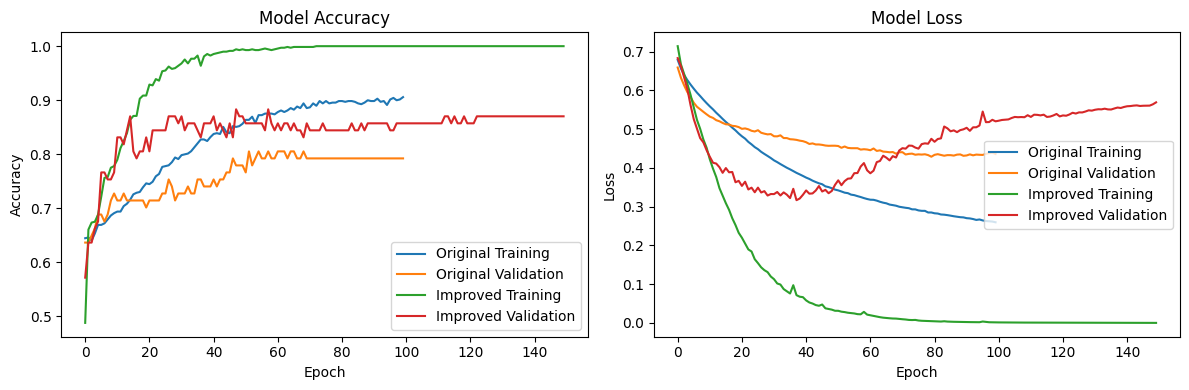


=== MODEL SAVING FORMATS EXPLAINED ===
TensorFlow/Keras supports several saving formats:
1. .keras (recommended): Native Keras format, smaller files, faster loading
2. .h5: HDF5 format (legacy), compatible with older TensorFlow versions
3. SavedModel: For deployment with TFLite, TensorFlow Serving, etc.
4. Weights only: Save just the learned parameters, not the architecture


In [21]:
# your code here
# Step 4: Improve Your Model
print("\n\n=== STEP 4: IMPROVE MODEL ===")

print("--- Building Improved Model ---")

# Create improved model with more layers and tuned parameters
improved_model = tf.keras.Sequential([
    # Larger first layer
    tf.keras.layers.Dense(32, activation='relu', input_shape=(9,)),
    
    # Additional hidden layers for more complexity
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    
    # Output layer
    tf.keras.layers.Dense(2, activation='softmax')
])

# Custom optimizer with adjusted learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Lower learning rate
# Learning rate controls how big steps the optimizer takes during training
# Smaller values = more careful learning, might take longer but be more stable

improved_model.compile(
    optimizer=custom_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Improved model architecture:")
improved_model.summary()

# Train with more epochs
print("\n--- Training Improved Model ---")
improved_history = improved_model.fit(
    X_train, y_train,
    epochs=150,                 # More epochs for better learning
    batch_size=16,              # Smaller batch size for more frequent updates
    validation_split=0.1,
    verbose=1
)

# Evaluate improved model
print("\n--- Evaluating Improved Model ---")
improved_test_loss, improved_test_accuracy = improved_model.evaluate(X_test, y_test, verbose=0)

print(f"\nComparison:")
print(f"Original Model  - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
print(f"Improved Model  - Loss: {improved_test_loss:.4f}, Accuracy: {improved_test_accuracy:.4f}")
print(f"Improvement     - Loss: {test_loss - improved_test_loss:+.4f}, Accuracy: {improved_test_accuracy - test_accuracy:+.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Original Training')
plt.plot(history.history['val_accuracy'], label='Original Validation')
plt.plot(improved_history.history['accuracy'], label='Improved Training')
plt.plot(improved_history.history['val_accuracy'], label='Improved Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Original Training')
plt.plot(history.history['val_loss'], label='Original Validation')
plt.plot(improved_history.history['loss'], label='Improved Training')
plt.plot(improved_history.history['val_loss'], label='Improved Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("\n=== MODEL SAVING FORMATS EXPLAINED ===")
print("TensorFlow/Keras supports several saving formats:")
print("1. .keras (recommended): Native Keras format, smaller files, faster loading")
print("2. .h5: HDF5 format (legacy), compatible with older TensorFlow versions")
print("3. SavedModel: For deployment with TFLite, TensorFlow Serving, etc.")
print("4. Weights only: Save just the learned parameters, not the architecture")


**Which approach(es) did you find helpful to improve your model performance?**

In [22]:

print("\n=== APPROACHES THAT HELPED ===")
print("1. Adding more layers: Allows model to learn more complex patterns")
print("2. Adjusting learning rate: Lower rate (0.001) for more stable training")
print("3. More epochs: Allows model to learn longer and reach better performance")
print("4. Smaller batch size: More frequent weight updates for better convergence")


=== APPROACHES THAT HELPED ===
1. Adding more layers: Allows model to learn more complex patterns
2. Adjusting learning rate: Lower rate (0.001) for more stable training
3. More epochs: Allows model to learn longer and reach better performance
4. Smaller batch size: More frequent weight updates for better convergence
